<a href="https://colab.research.google.com/github/amiguelnobrega/Nba/blob/main/nba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Package Import

In [1]:
# Import relevant libraries and modules.

import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

In [2]:
# Mount Google Drive in colab notebook

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Load extracted_nba_players_data.csv into a DataFrame called extracted_data.

extracted_data = pd.read_csv('/content/gdrive/Othercomputers/My MacBook Air/Estudo/Google Advance DA/Projects/NBA/extracted_nba_players_data.csv', index_col=0)
print('done!')

done!


In [5]:
extracted_data.head()

,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
fg,,,,,,,,,,
34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304


#Model Preparation

###Isolate target and predictor variables

In [6]:
# Define the y (target) variable.

y = extracted_data['target_5yrs']

# Define the X (predictor) variables.

X = extracted_data.drop('target_5yrs', axis = 1)

In [7]:
# Display the first 10 rows of the target data.

y.head(10)

,target_5yrs
fg,
34.7,0
29.6,0
42.2,0
42.6,1
52.4,1
42.3,0
43.5,1
41.5,1
39.2,0


In [8]:
# Display the first 10 rows of the predictor variables.

X.head(10)

,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
fg,,,,,,,,,
34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304
42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,0.324561
43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,0.605505
41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,0.553398
39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,0.242424


### Perform a split operation on the data

Divide the data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [9]:
# Perform the split operation on the data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [10]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.

print(X_train.shape)

# Print the shape of X_test.

print(X_test.shape)

# Print the shape of y_train.

print(y_train.shape)

# Print the shape of y_test.

print(y_test.shape)

(1005, 9)
(335, 9)
(1005,)
(335,)


Each training DataFrame contains 1,005 rows, while each test DataFrame contains 335 rows. Additionally, there are 10 columns in each X DataFrame, with only one column in each y DataFrame.

The effect of the train-test split showed an approximately 75% training and 25% test split.

#Model Building

Using the assumption that the features are normally distributed and continuous, the Gaussian Naive Bayes algorithm is most appropriate for the data. While the data may not perfectly adhere to these assumptions, this model will still yield the most usable and accurate results.

###Fit the model to the training data and predict on the test data

In [11]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

nb = naive_bayes.GaussianNB()

# Fit the model on the training data.

nb.fit(X_train, y_train)

# Apply the model to predict on the test data ("y_pred").

y_pred = nb.predict(X_test)

#Results and Evaluation

In [12]:
# Print the accuracy score.

print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred))

# Print the precision score.

print('precision score:'), print(metrics.precision_score(y_test, y_pred))

# Print the recall score.

print('recall score:'), print(metrics.recall_score(y_test, y_pred))

# Print the f1 score.

print('f1 score:'), print(metrics.f1_score(y_test, y_pred))

accuracy score:
0.6805970149253732
precision score:
0.8473282442748091
recall score:
0.5606060606060606
f1 score:
0.6747720364741641


(None, None)

The accuracy score for this model is 0.6896, or 69.0% accurate.

While accuracy is often the most intuitive metric, it is a poor evaluation metric in some cases. In particular, if you have imbalanced classes, a model could appear accurate but be poor at balancing false positives and false negatives.

The model shows a precision score of 0.8406, suggesting the model is quite good at predicting true positives—meaning the player will play longer than five years—while balancing false positives. The recall score of 0.5859 shows worse performance in predicting true negatives—where the player will not play for five years or more—while balancing false negatives.These two metrics combined can give a better assessment of model performance than accuracy does alone.

The F1 score balances the precision and recall performance to give a combined assessment of how well this model delivers predictions. In this case, the F1 score is 0.6905, which suggests reasonable predictive power in this model.

### Gain clarity with the confusion matrix
A confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

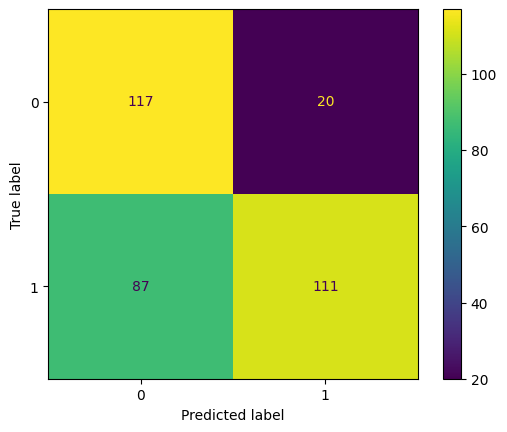

In [13]:
# Construct and display the confusion matrix.

# Construct the confusion matrix for the predicted and test values.

cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for the confusion matrix.

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plot the visual in-line.

disp.plot()

###Interpretation


*   The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.

* The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.8406).

* True negatives and false negatives are closer in number, which explains the worse recall score.



###Conclusion
* The model created provides some value in predicting an NBA player's chances of playing for five years or more.
* Notably, the model performed better at predicting true positives than it did at predicting true negatives. In other words, it more accurately identified those players who will likely play for more than five years than it did those who likely will not.